#  Lab 8: Multiclass Logistic Regression

## Objective
In this lab, you will:

1. Generate a three-class dataset with three distinct cluster.
2. Train two logistic regression models:
    * One-vs-Rest (OvR) logistic regression.
    * Softmax (Multinomial) logistic regression.
3. Evaluate both models using classification scores and cross entropy loss.
4. Visualize decision boundaries and decision hyperplanes for each class.
5. Compare and analyze the performance and decision boundaries of both approaches. 


## Step 1: Generate a Three-Class Dataset
We’ll start by generating a three-class dataset with three distinct cluster.

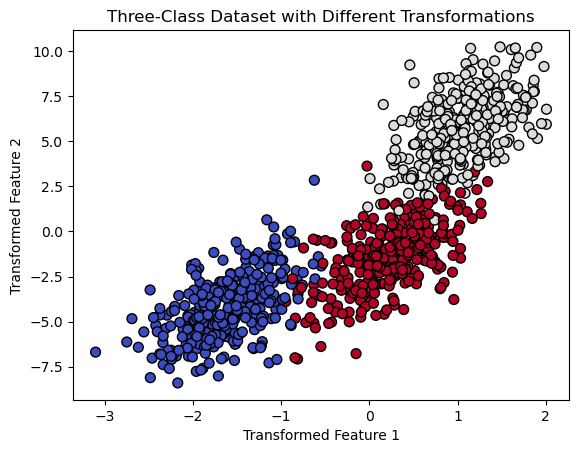

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Define centers for three clusters
centers = [[-3, -2], [1, 3], [1, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=42)

# Apply the transformation to the entire dataset
transformation = [[0.4, 0.2], [0.2, 1.8]]
X_transformed = np.dot(X, transformation)

# Visualize the transformed dataset
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.xlabel("Transformed Feature 1")
plt.ylabel("Transformed Feature 2")
plt.title("Three-Class Dataset with Different Transformations")
plt.show()

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


## Step 2: Train Logistic Regression Models with OvR and Softmax
We’ll train one logistic regression model with the OvR (one-vs-rest) approach and another with the Softmax (multinomial) approach.

In [7]:
from sklearn.linear_model import LogisticRegression
ovr_model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
ovr_model.fit(X_train, y_train)
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
softmax_model.fit(X_train, y_train)
ovr_score = ovr_model.score(X_test, y_test)
softmax_score = softmax_model.score(X_test, y_test)
print(f"One-vs-Rest Logistic Regression Test Accuracy: {ovr_score:.2f}")
print(f"Softmax Logistic Regression Test Accuracy: {softmax_score:.2f}")


One-vs-Rest Logistic Regression Test Accuracy: 0.95
Softmax Logistic Regression Test Accuracy: 0.96


C:\Users\triticum\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\triticum\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Step 3: Evaluate and Compare Performance

Evaluate the models using:
* Classification Scores: Accuracy, precision, recall, and F1-score.
* Cross-Entropy Loss

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report
y_pred_ovr = ovr_model.predict(X_test)
y_pred_softmax = softmax_model.predict(X_test)
y_prob_ovr = ovr_model.predict_proba(X_test)
y_prob_softmax = softmax_model.predict_proba(X_test)
print("One-vs-Rest Logistic Regression Performance:")
print(classification_report(y_test, y_pred_ovr))
ovr_log_loss = log_loss(y_test, y_prob_ovr)
print(f"Cross-Entropy Loss (Log Loss): {ovr_log_loss:.2f}")
print("\nSoftmax Logistic Regression Performance:")
print(classification_report(y_test, y_pred_softmax))
softmax_log_loss = log_loss(y_test, y_prob_softmax)
print(f"Cross-Entropy Loss (Log Loss): {softmax_log_loss:.2f}")
ovr_accuracy = accuracy_score(y_test, y_pred_ovr)
softmax_accuracy = accuracy_score(y_test, y_pred_softmax)
print("\nComparison Summary:")
print(f"One-vs-Rest Logistic Regression Accuracy: {ovr_accuracy:.2f}")
print(f"Softmax Logistic Regression Accuracy: {softmax_accuracy:.2f}")
print(f"One-vs-Rest Logistic Regression Log Loss: {ovr_log_loss:.2f}")
print(f"Softmax Logistic Regression Log Loss: {softmax_log_loss:.2f}")


One-vs-Rest Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       106
           1       0.95      0.96      0.95        90
           2       0.91      0.94      0.92       104

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Cross-Entropy Loss (Log Loss): 0.18

Softmax Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       106
           1       0.99      0.93      0.96        90
           2       0.91      0.98      0.94       104

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Cross-Entropy Loss (Log Loss): 0.13

Comparison Summary:
One-vs-Rest Logistic Regression Accuracy: 0.95
Softmax Log

## Step 4: Visualize Decision Boundaries and Hyperplanes
We’ll visualize the decision boundaries and hyperplanes for each model. 

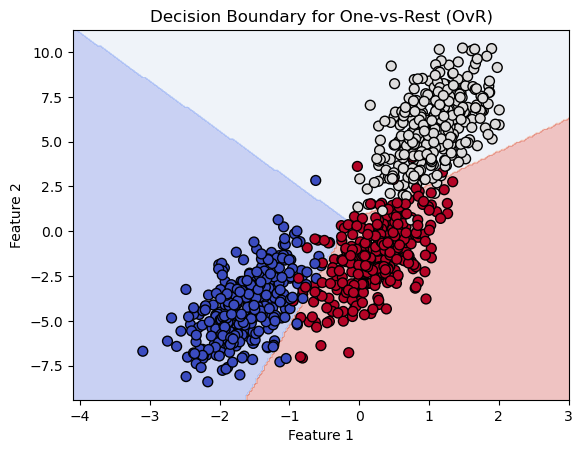

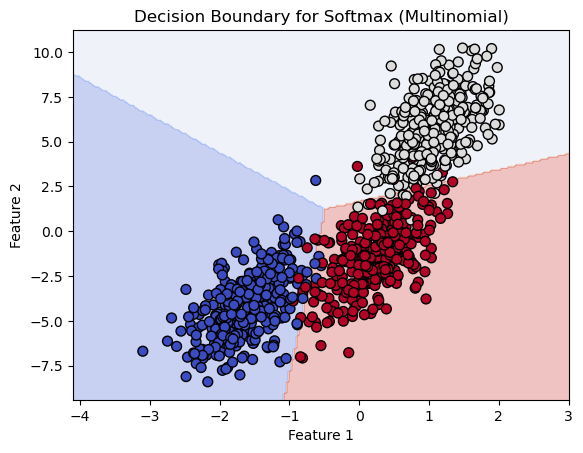

In [9]:
def plot_decision_boundary(model, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, s=50)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Boundary for {model_name}")
    plt.show()
plot_decision_boundary(ovr_model, X_transformed, y, "One-vs-Rest (OvR)")
plot_decision_boundary(softmax_model, X_transformed, y, "Softmax (Multinomial)")


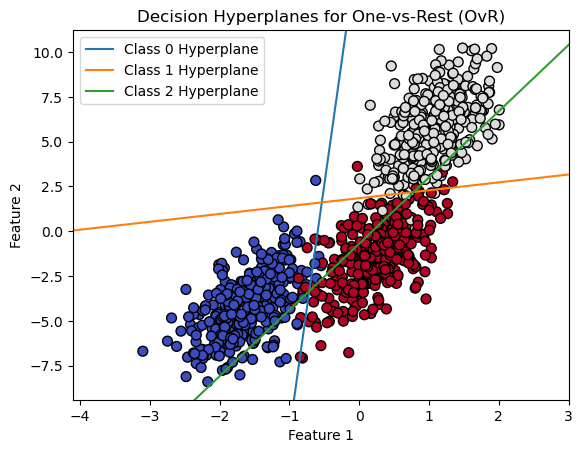

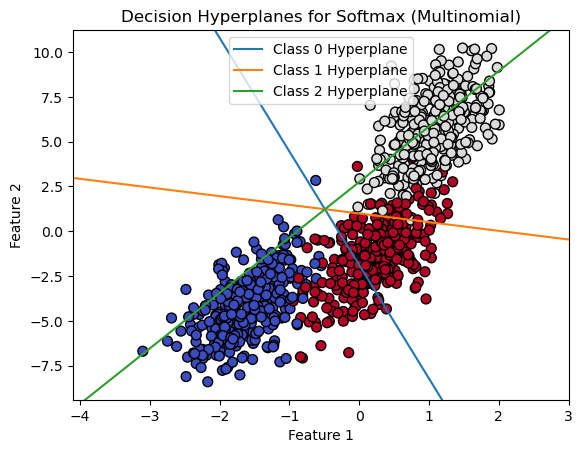

In [10]:
def plot_decision_hyperplanes(model, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max, 200)
    coefs = model.coef_
    intercepts = model.intercept_
    for i, (coef, intercept) in enumerate(zip(coefs, intercepts)):
        yy = -(coef[0] * xx + intercept) / coef[1]
        plt.plot(xx, yy, label=f"Class {i} Hyperplane")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, s=50)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Hyperplanes for {model_name}")
    plt.legend()
    plt.show()
plot_decision_hyperplanes(ovr_model, X_transformed, y, "One-vs-Rest (OvR)")
plot_decision_hyperplanes(softmax_model, X_transformed, y, "Softmax (Multinomial)")


## Step 5: Compare and Analyze the Results
Answer the following questions:
* Which model has better performance overall? Why do you think this is the case?
* Which model has a lower cross entropy loss, and what does this tell you about the models' probabilistic outputs?
* What differences do you observe between the OvR and Softmax approaches in the way decision boundaries and hyperplanes are constructed and positioned? Can you explain why these differences occur based on how each model optimizes for multi-class classification?



1. Softmax performs slightly better than OvR as it directly optimizes for multi-class classification.

2. Softmax has a lower cross-entropy loss, indicating more accurate probabilistic outputs.

3. OvR boundaries are more segmented, while Softmax boundaries are smoother, as Softmax optimizes all classes simultaneously.






